[*********************100%***********************]  1 of 1 completed


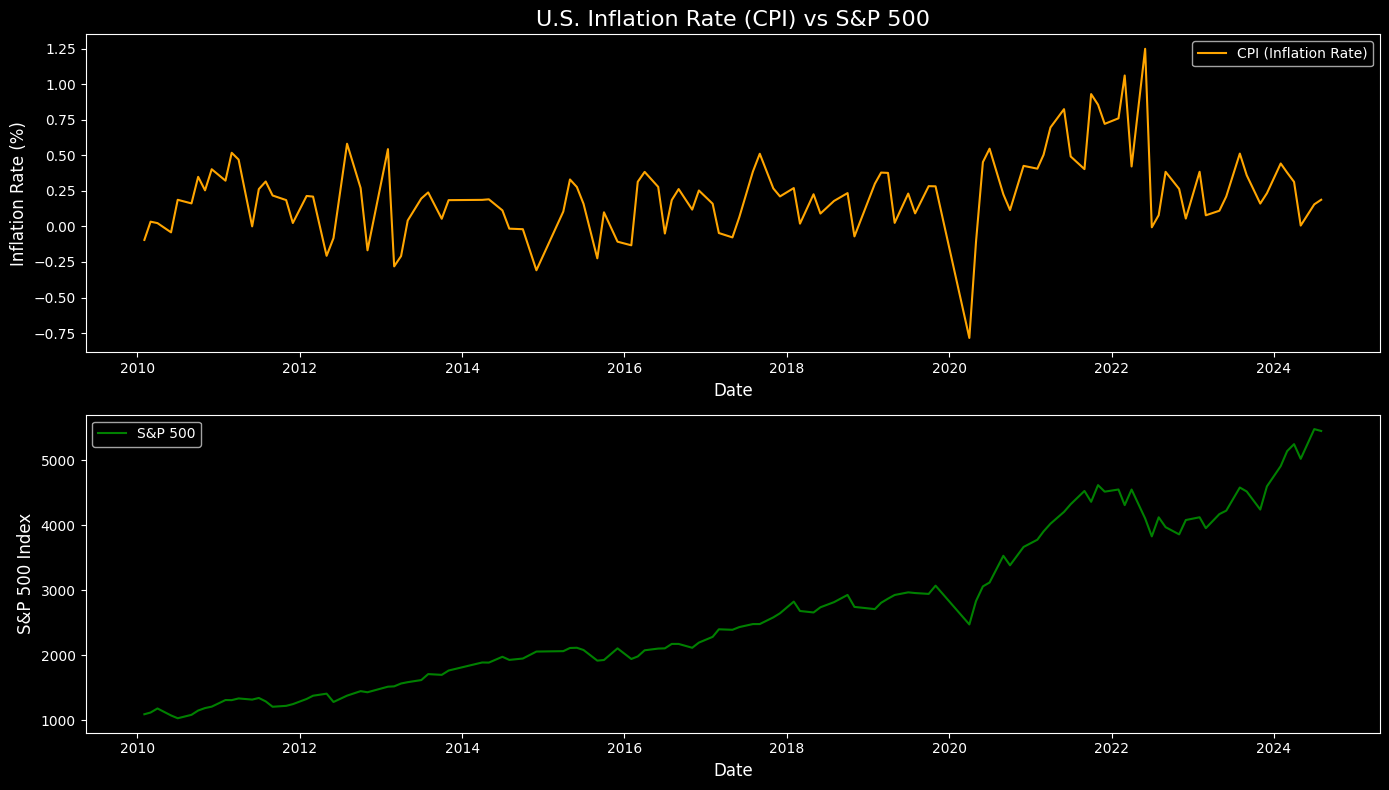

Correlation between U.S. Inflation and S&P 500: 0.40


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from fredapi import Fred

# Define user parameters
start_date = '2010-01-01'
end_date = '2024-10-01'
index_symbol = '^GSPC'  # S&P 500 Index symbol for Yahoo Finance

# FRED API key
fred_api_key = 'Enter Your Key'
fred = Fred(api_key=fred_api_key)

# Fetch U.S. inflation data (CPI) from FRED
try:
    cpi = fred.get_series('CPIAUCSL', start=start_date, end=end_date)  # CPI for All Urban Consumers
except Exception as e:
    print(f"Error fetching CPI data from FRED: {e}")
    cpi = pd.Series()

# Fetch S&P 500 data from yfinance
try:
    sp500 = yf.download(index_symbol, start=start_date, end=end_date)
except Exception as e:
    print(f"Error fetching S&P 500 data from yfinance: {e}")
    sp500 = pd.DataFrame()

# Combine data into a single DataFrame and calculate inflation rate (percentage change in CPI)
if not cpi.empty and not sp500.empty:
    cpi = cpi.pct_change() * 100  # Convert CPI to percentage change (inflation rate)
    combined_df = pd.DataFrame({
        'CPI (Inflation Rate)': cpi,
        'S&P 500': sp500['Close']
    }).dropna()

    # Plotting with black background
    plt.style.use('dark_background')
    plt.figure(figsize=(14, 8))

    # Plot CPI (Inflation Rate)
    plt.subplot(2, 1, 1)
    plt.plot(combined_df.index, combined_df['CPI (Inflation Rate)'], label='CPI (Inflation Rate)', color='orange')
    plt.title('U.S. Inflation Rate (CPI) vs S&P 500', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Inflation Rate (%)', fontsize=12)
    plt.legend()

    # Plot S&P 500
    plt.subplot(2, 1, 2)
    plt.plot(combined_df.index, combined_df['S&P 500'], label='S&P 500', color='green')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('S&P 500 Index', fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Correlation Analysis
    correlation = combined_df['CPI (Inflation Rate)'].corr(combined_df['S&P 500'])
    print(f"Correlation between U.S. Inflation and S&P 500: {correlation:.2f}")
else:
    print("Data is not available for the specified time range.")
